<div style="padding:20px;color:#DEB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#990012;overflow:hidden;font-weight:800">🍷 Wine Quality 🍷</div>



* This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
* The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 
* The datasets can be viewed as classification or regression tasks. 
* The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
* Our task is to predict the quality of wine using the given data.

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>1 | Content Overview</div></b>

<b>1 | Content Overview</b>
 
<b>2 | Libraries and Dataset Setup</b>
 
   * 2.1 Import Libraries
   * 2.2 Configure Properties
   * 2.3 Import Data

<b>3 | Structure Investigation</b>
 
   * 3.1 Structure Size
   * 3.2 Differences in structure
   * 3.3 Datatypes Available
   * 3.4 Features Descriptions   
    
<b>4 | Dataframe Content Inspection</b>
 
   * 4.1 Null Values Check
   * 4.2 Unique Values Check
   * 4.3 Value Behaviour

<b>5 | Target Variable Analysis</b>
 
   * 5.1 For Original Data
   * 5.2 For Training Data
    
<b>6 | Univariate Analysis</b>
 
   * 6.1 Summary for Columns (Describe)
   * 6.2 Individual Column Shape
   * 6.3 Individual Column Value Observation (Outlier using IQR)
    
<b>7 | Combining Data and Relationship matrix</b>
 
   * 7.1 Combining Original and Training Data
   * 7.2 Creating Relation Matrix and Graph For Combined Training Data
   * 7.3 Creating Relation Matrix and Graph For Test Data
    
<b>8 | Multivariate Analysis wrt Quality</b>
 
   * 8.1 Relation with Quality in terms of corr coeficient (Combined Training and Org Data)
   * 8.2 Relation with Quality using pairplot (Combined Training and Org Data)
   * 8.3 Relation with Quality using boxplot (Combined Training and Org Data)
 
<b>9 | Multivariate Analysis leaving Quality</b>
 
   * 9.1 Other Interesting Relationships For Training Data (Original & Training Data Combined)
   * 9.2 Other Interesting Relationships For Test Data
 
<b>10 | Analysis So Far</b>
 
<b>11 | Data Preparation ( Normal and Smote )</b>
 
   * 11.1 Data and Random State Setup
   * 11.2 Regular Training Data
   * 11.3 Smote Training Data
   
<b>12 | Classification Approach</b>
 
   * 12.1 Metrics and Initial Setups
   * 12.2 Model Algorithms Initialisation
   * 12.3 Model Fitting on Regular Data
   * 12.4 Model Fitting on Smote Data
   
<b>13 | Overall Performance</b>
 
   * 13.1 Analyzing Model Performances
   * 13.2 Analyzing Predictions Made wrt Target Prediction 
   
<b>14 | Regression Approach</b>
 
   * In progress
   
<b>15 | Other Notebooks </b>

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries & Dataset Setup</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#990012'> Import Libraries</span></b>  

In [89]:
from IPython.display import clear_output
!pip install plotly --upgrade
#!pip install imblearn
clear_output()

In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import  train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from lightgbm import LGBMClassifier

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#990012'> Configure Properties</span></b>  

In [91]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#990012'> Import Data</span></b>  

In [92]:
df_original=pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df_train=pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s3e5/test.csv")

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>3  |  Inspecting Dataframe Structure</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#990012'> Structure Size</span></b>  

In [93]:
df_original.shape

(1143, 13)

In [94]:
df_train.shape

(2056, 13)

In [95]:
df_test.shape

(1372, 12)

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above numbers we can see 1 extra column present in training data compared to original data</div>

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#990012'> Differences in structure</span></b>  

In [96]:
print('Column Present only in original ', set(df_original.columns).difference(set(df_train.columns)))
print('Column Present only in train    ', set(df_train.columns).difference(set(df_original.columns)))
print('Column Present only in test    ', set(df_test.columns).difference(set(df_original.columns)))

Column Present only in original  set()
Column Present only in train     set()
Column Present only in test     set()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Similar Columns in Original and Competiion Data</div>

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#990012'> Datatypes Available</span></b>  

In [97]:
pd.value_counts(df_train.dtypes)

float64    11
int64       2
dtype: int64

In [98]:
pd.value_counts(df_original.dtypes)

float64    11
int64       2
dtype: int64

In [99]:
pd.value_counts(df_test.dtypes)

float64    11
int64       1
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Same datatypes available in training as well as Original dataset</div>

### <b><span style='color:#DEB078'>3.4 |</span><span style='color:#990012'> Features Descriptions</span></b>  

* <b>Fixed acidity </b> : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).  
 
* <b>Volatile acidity </b>: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
    
* <b>Citric acid </b>: found in small quantities, citric acid can add 'freshness' and flavor to wines.   
 
* <b>Residual sugar </b>: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.    

* <b>Chlorides </b>: the amount of salt in the wine.
    
* <b>Free sulfur dioxide </b>: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. 
   
* <b>Total sulfur dioxide </b>: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 
* <b>Density </b>: the density of water is close to that of water depending on the percent alcohol and sugar content.
    
* <b>pH </b>: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
    
* <b>Sulphates </b>: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. 
   
* <b>Alcohol </b>: the percent alcohol content of the wine.    

* <b>Quality </b>: wine quality rating

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>4  | Dataframe Content Inspection</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#990012'> Null Values Check</span></b>

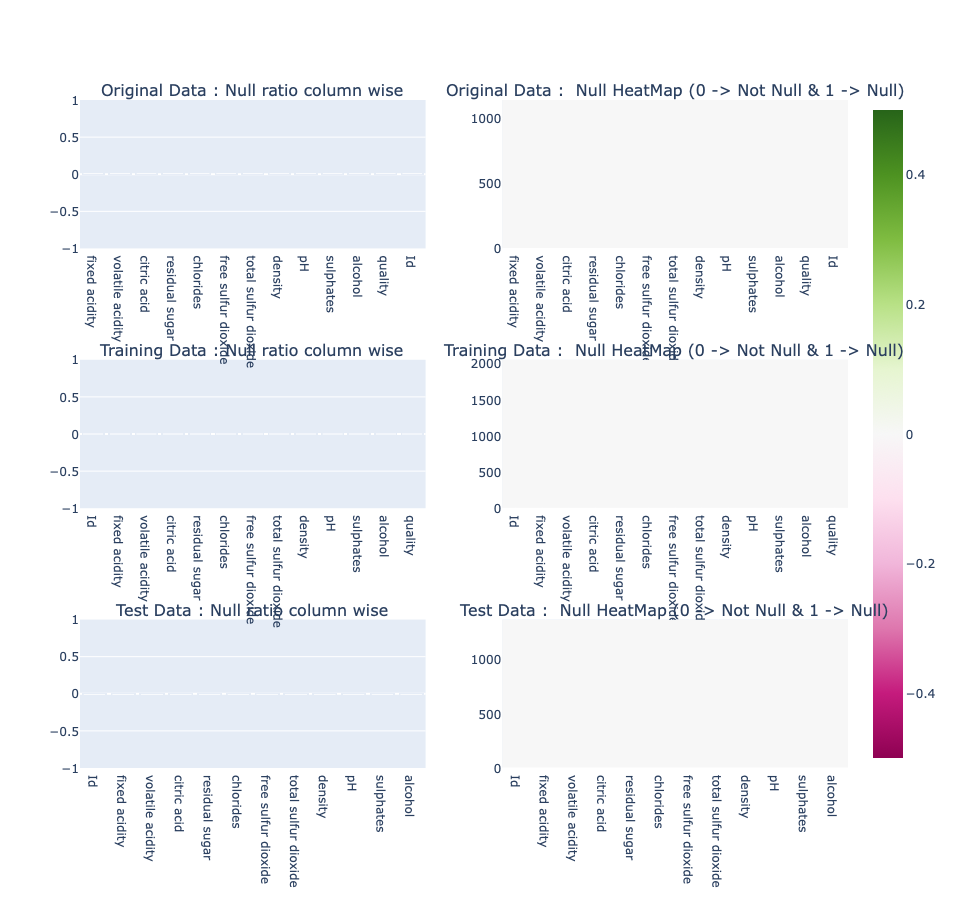

In [100]:
fig= make_subplots(rows=3,cols=2,
                  subplot_titles=(
                      "Original Data : Null ratio column wise", "Original Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Training Data : Null ratio column wise", "Training Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Test Data : Null ratio column wise", "Test Data :  Null HeatMap (0 -> Not Null & 1 -> Null)"
                                 
                                 )
                  )



temp_data= df_original.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df_original.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

temp_data= df_train.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=2, col=1
)

fig.add_trace(px.imshow(
                        df_train.isna().astype(np.int8)
                       ).data[0],
              row=2,col=2)

temp_data= df_test.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=3, col=1
)

fig.add_trace(px.imshow(
                        df_test.isna().astype(np.int8)
                       ).data[0],
              row=3,col=2)

fig.update_layout(showlegend=False,height=900)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see No null values present in original Dataset as well as training dataset</div>

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#990012'> Unique Values Check</span></b>

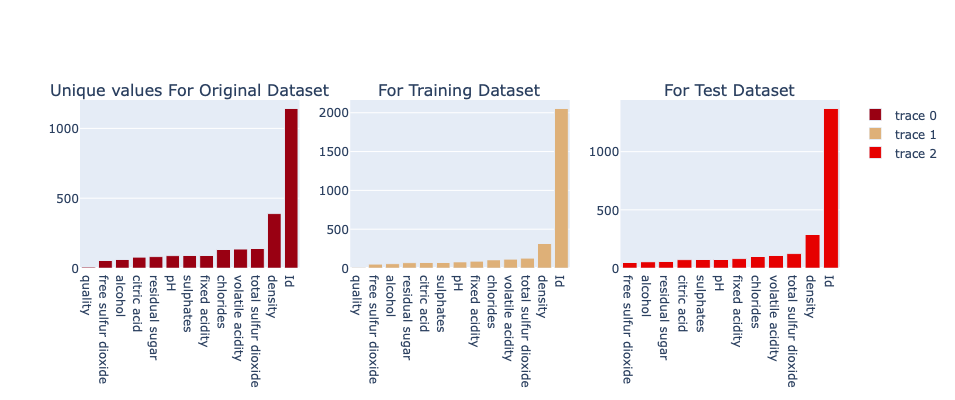

In [101]:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "For Training Dataset","For Test Dataset"))

temp_data=df_original.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#990012')),
    row=1, col=1
)

temp_data=df_train.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

temp_data=df_test.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#e60000')),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see unique values present in original Dataset as well as training dataset is approx similliar in distribution</div>

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#990012'> Value Behaviour</span></b>

#### For all Numerical columnn for all rows 
df_original.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(14,5), markersize=5,color='#990012')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

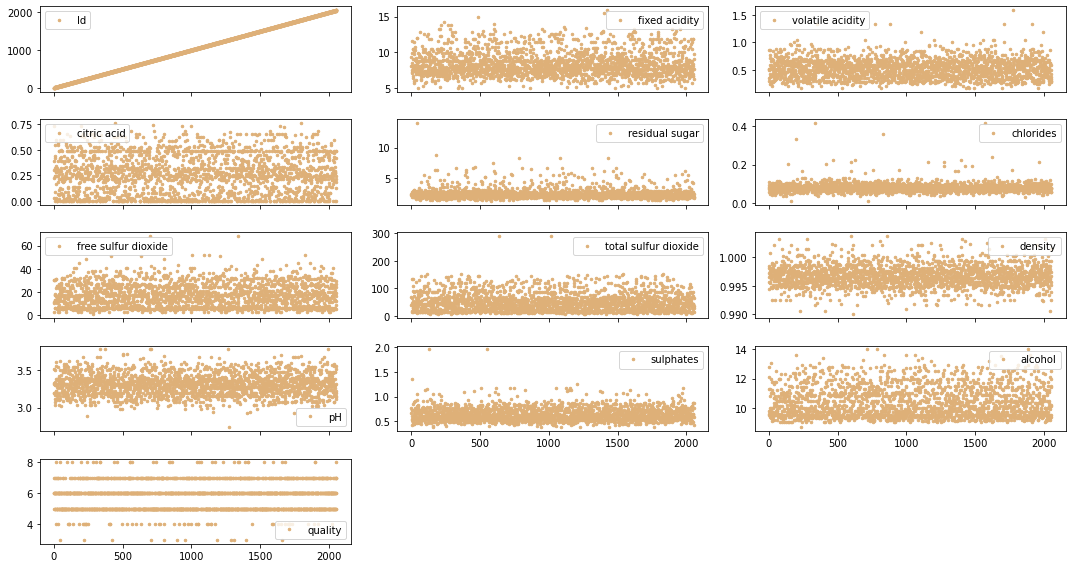

In [102]:
# For all Numerical columnn for all rows 
df_train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(15,8), markersize=5,color='#DEB078')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

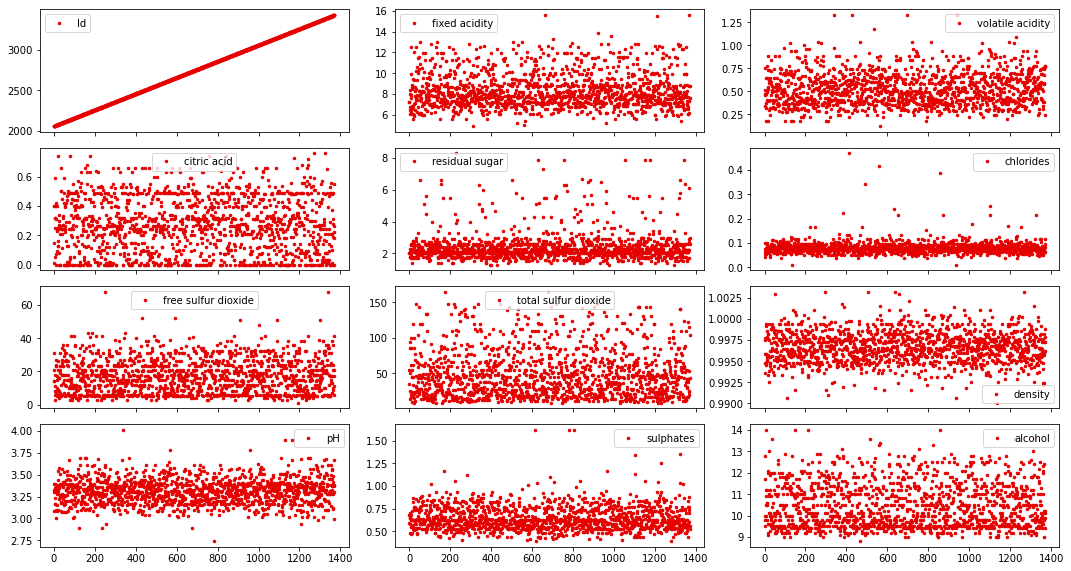

In [103]:
# For all Numerical columnn for all rows 
df_test.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(15,8), markersize=5,color='#e60000')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>5 | Target Variable Analysis</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#990012'> For Original Data</span></b>

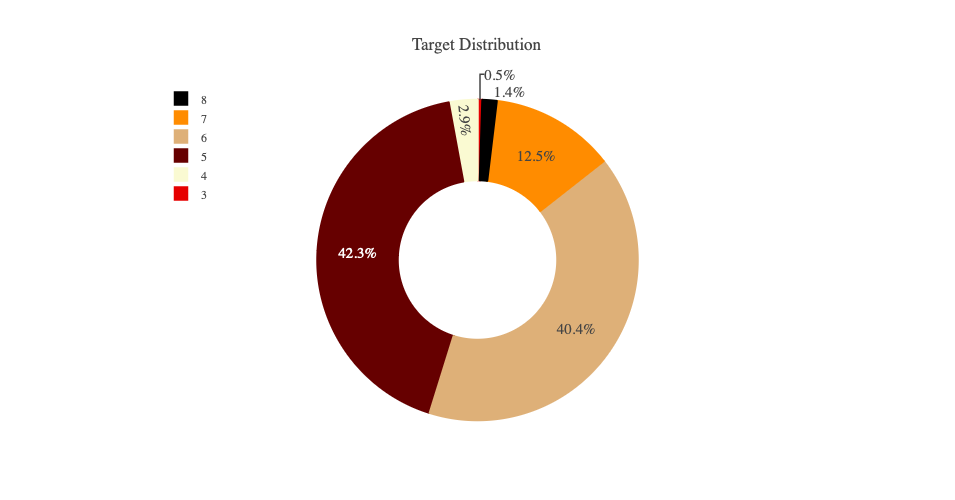

In [104]:
target=df_original[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'], ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#990012'> For Training Data</span></b>

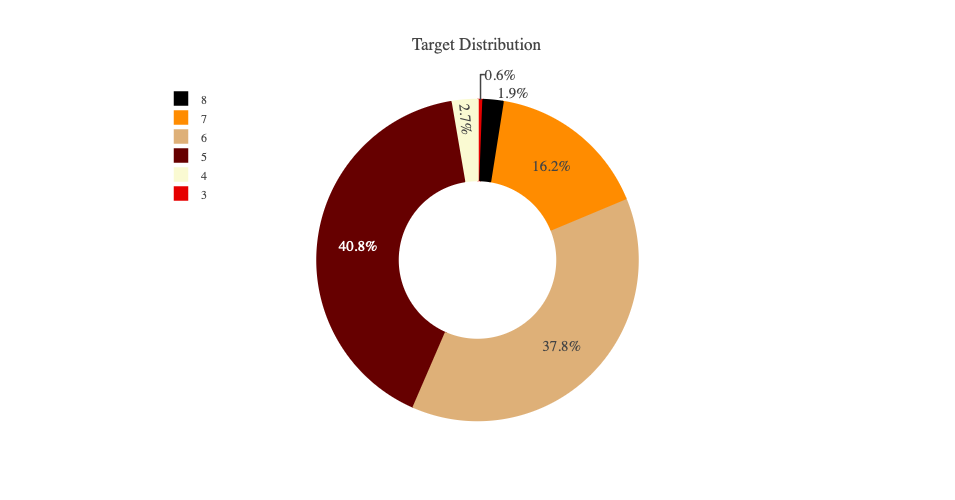

In [105]:

target=df_train[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'], ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()



<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>6 | Univariate Analysis</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#990012'> Summary for Columns (Describe)</span></b>

In [106]:
df_original.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [107]:
df_train.describe()

Id  fixed acidity  volatile acidity  citric acid  \
count  2056.000000    2056.000000       2056.000000  2056.000000   
mean   1027.500000       8.365175          0.527601     0.265058   
std     593.660397       1.705390          0.173164     0.188267   
min       0.000000       5.000000          0.180000     0.000000   
25%     513.750000       7.200000          0.390000     0.090000   
50%    1027.500000       7.950000          0.520000     0.250000   
75%    1541.250000       9.200000          0.640000     0.420000   
max    2055.000000      15.900000          1.580000     0.760000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     2056.000000  2056.000000          2056.000000           2056.000000   
mean         2.398881     0.081856            16.955982             49.236868   
std          0.858824     0.023729            10.009710             32.961141   
min          1.200000     0.012000             1.000000              7.000000   
25%          1.900000     0.071000             8.000000             22.000000   
50%          2.200000     0.079000            16.000000             44.000000   
75%          2.600000     0.090000            24.000000             65.000000   
max         14.000000     0.414000            68.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000  
mean      0.996748     3.310569     0.641308    10.414972     5.720817  
std       0.001827     0.142321     0.137942     1.028825     0.853146  
min       0.990070     2.740000     0.390000     8.700000     3.000000  
25%       0.995600     3.200000     0.550000     9.500000     5.000000  
50%       0.996700     3.310000     0.610000    10.100000     6.000000  
75%       0.997800     3.390000     0.720000    11.000000     6.000000  
max       1.003690     3.780000     1.950000    14.000000     8.000000

In [108]:
df_test.describe()

Id  fixed acidity  volatile acidity  citric acid  \
count  1372.000000    1372.000000       1372.000000  1372.000000   
mean   2741.500000       8.369606          0.524311     0.270569   
std     396.206596       1.664694          0.176942     0.185731   
min    2056.000000       4.900000          0.120000     0.000000   
25%    2398.750000       7.100000          0.390000     0.110000   
50%    2741.500000       7.900000          0.500000     0.260000   
75%    3084.250000       9.100000          0.635000     0.420000   
max    3427.000000      15.600000          1.330000     0.760000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     1372.000000  1372.000000          1372.000000           1372.000000   
mean         2.415926     0.081307            17.162536             49.089286   
std          0.921155     0.026566             9.974082             32.803721   
min          1.300000     0.012000             1.000000              8.000000   
25%          2.000000     0.070000             8.000000             23.000000   
50%          2.200000     0.078000            16.000000             43.000000   
75%          2.500000     0.087000            24.000000             66.000000   
max          8.300000     0.467000            68.000000            165.000000   

           density           pH    sulphates      alcohol  
count  1372.000000  1372.000000  1372.000000  1372.000000  
mean      0.996670     3.312223     0.647267    10.473081  
std       0.001822     0.141405     0.134792     1.027170  
min       0.990070     2.740000     0.390000     8.800000  
25%       0.995380     3.210000     0.550000     9.600000  
50%       0.996600     3.310000     0.620000    10.200000  
75%       0.997800     3.390000     0.730000    11.200000  
max       1.003200     4.010000     1.620000    14.000000

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#990012'> Individual Column Shape </span></b>

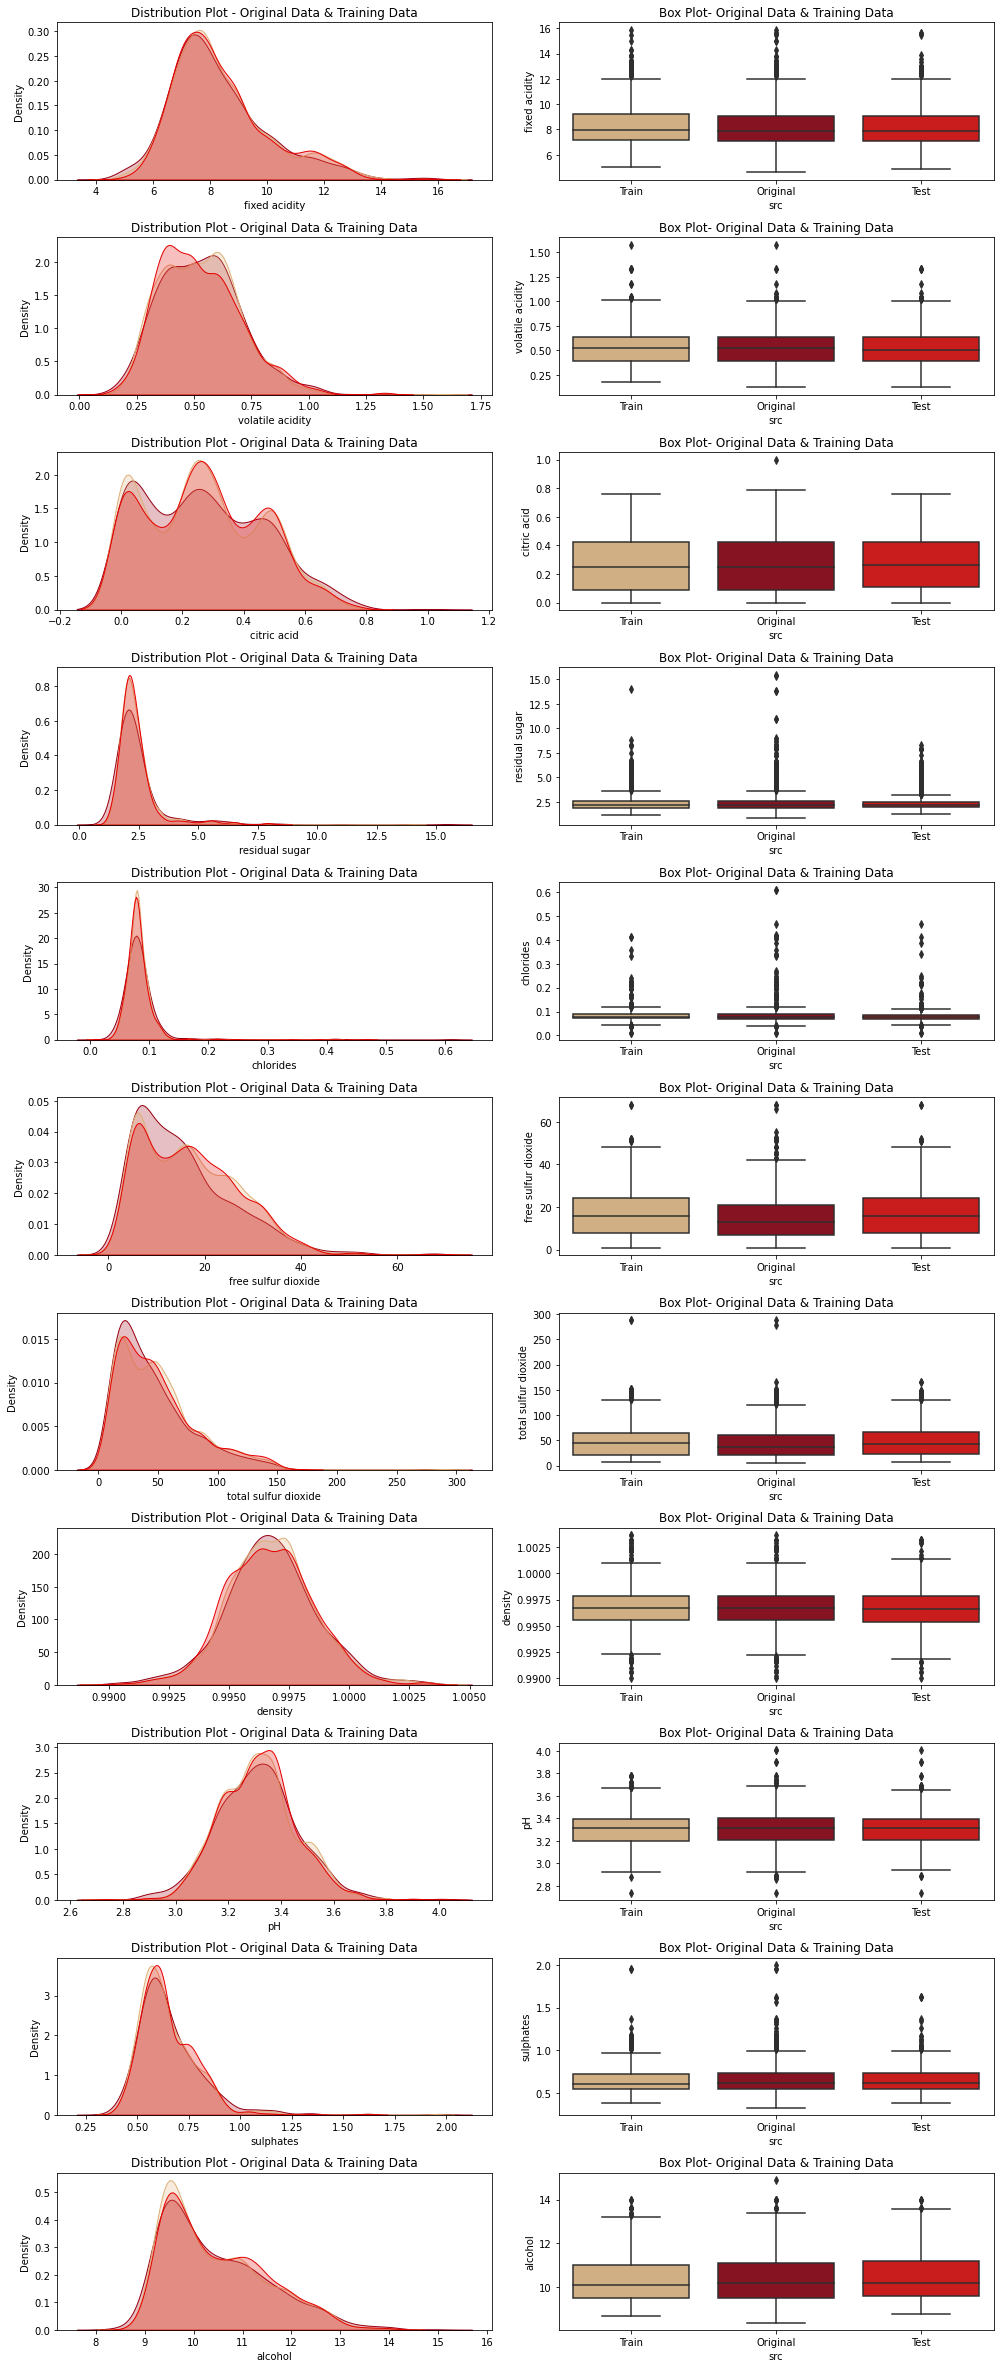

In [109]:
ncols = 2
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

nrows = len(cont_features)
df_temp=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original'),df_test.assign(src='Test')])
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 3*nrows))

for r in range(nrows):
    row = cont_features[r]
   
    sns.kdeplot(x=df_original[row], ax=axes[r,0], color='#990012', label='Test data', fill =True)
    sns.kdeplot(x=df_train[row], ax=axes[r,0], color='#DEB078', label='Train data' , fill =True )
    sns.kdeplot(x=df_test[row], ax=axes[r,0], color='#e60000', label='Test data', fill =True)
    
    sns.boxplot(data=df_temp, y=row,x='src' ,ax=axes[r,1],palette=['#DEB078','#990012','#e60000'])


    axes[r,0].title.set_text("Distribution Plot - Original Data & Training Data")
    axes[r,1].title.set_text("Box Plot- Original Data & Training Data")
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Distribution is almost overlapping for all three dataset , we can combine original dataset with train dataset for training</div>

### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#990012'> Individual Column Value Observation (Outlier using IQR)</span></b>

In [110]:
upper_org =df_original.quantile(0.75)+1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))
lower_org = df_original.quantile(0.25)-1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))

upper_train =df_train.quantile(0.75)+1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))
lower_train = df_train.quantile(0.25)-1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))

upper_test =df_test.quantile(0.75)+1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))
lower_test = df_test.quantile(0.25)-1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))




columns_to_be_checked=cont_features

for i in columns_to_be_checked:

    
    print('\nColumn -> ',i,'\n')
    
    x= df_original[ (df_original[i]<round(lower_org[i],2)) |  (df_original[i]>round(upper_org[i],2))][i].to_list()
    print('Skewness -> ',round(df_original[i].skew(),3) ,' | Outliers presesnt in Original Dataset -> ',len(x),'  Out of Total -> ',len(df_original))
          
    x= df_train[ (df_train[i]<round(lower_train[i],2)) |  (df_train[i]>round(upper_train[i],2))][i].to_list()
    print('Skewness -> ',round(df_train[i].skew(),3) ,' | Outliers presesnt in Training Dataset -> ',len(x),'  Out of Total -> ',len(df_train))
          
    x= df_test[ (df_test[i]<round(lower_test[i],2)) |  (df_test[i]>round(upper_test[i],2))][i].to_list()
    print('Skewness -> ',round(df_test[i].skew(),3) ,' | Outliers presesnt in Test Dataset -> ',len(x),'  Out of Total -> ',len(df_test))
          
          
    print('\n','*'*10)


Column ->  fixed acidity 

Skewness ->  1.045  | Outliers presesnt in Original Dataset ->  44   Out of Total ->  1143
Skewness ->  0.96  | Outliers presesnt in Training Dataset ->  79   Out of Total ->  2056
Skewness ->  0.998  | Outliers presesnt in Test Dataset ->  47   Out of Total ->  1372

 **********

Column ->  volatile acidity 

Skewness ->  0.682  | Outliers presesnt in Original Dataset ->  14   Out of Total ->  1143
Skewness ->  0.668  | Outliers presesnt in Training Dataset ->  15   Out of Total ->  2056
Skewness ->  0.751  | Outliers presesnt in Test Dataset ->  15   Out of Total ->  1372

 **********

Column ->  citric acid 

Skewness ->  0.372  | Outliers presesnt in Original Dataset ->  1   Out of Total ->  1143
Skewness ->  0.247  | Outliers presesnt in Training Dataset ->  0   Out of Total ->  2056
Skewness ->  0.212  | Outliers presesnt in Test Dataset ->  0   Out of Total ->  1372

 **********

Column ->  residual sugar 

Skewness ->  4.361  | Outliers presesnt in O

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Combining Data and Relationship matrix</div></b>

### <b><span style='color:#DEB078'>7.1 |</span><span style='color:#990012'> Combining Original and Training Data</span></b>

In [111]:
df_combined=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original')]).reset_index(drop=True)

### <b><span style='color:#DEB078'>7.2 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Combined Training Data</span></b>

In [112]:
temp_corr_combined=df_combined.corr(method='spearman')
temp_corr_combined

Id  fixed acidity  volatile acidity  citric acid  \
Id                    1.000000      -0.098812         -0.021350    -0.031516   
fixed acidity        -0.098812       1.000000         -0.332379     0.672596   
volatile acidity     -0.021350      -0.332379          1.000000    -0.630386   
citric acid          -0.031516       0.672596         -0.630386     1.000000   
residual sugar       -0.045016       0.265619         -0.038894     0.197652   
chlorides            -0.066036       0.257666          0.103305     0.148357   
free sulfur dioxide   0.057612      -0.205101          0.067066    -0.140202   
total sulfur dioxide -0.025315      -0.103315          0.118507    -0.058609   
density              -0.136715       0.592302         -0.036825     0.351102   
pH                    0.056424      -0.708340          0.249040    -0.550750   
sulphates            -0.010600       0.168971         -0.368907     0.313803   
alcohol               0.088401      -0.076963         -0.221021     0.070603   
quality               0.048573       0.079905         -0.300967     0.179903   

                      residual sugar  chlorides  free sulfur dioxide  \
Id                         -0.045016  -0.066036             0.057612   
fixed acidity               0.265619   0.257666            -0.205101   
volatile acidity           -0.038894   0.103305             0.067066   
citric acid                 0.197652   0.148357            -0.140202   
residual sugar              1.000000   0.195544            -0.008375   
chlorides                   0.195544   1.000000            -0.014939   
free sulfur dioxide        -0.008375  -0.014939             1.000000   
total sulfur dioxide        0.061935   0.092030             0.786246   
density                     0.374912   0.400109            -0.065455   
pH                         -0.149257  -0.215541             0.139415   
sulphates                   0.037882  -0.021918            -0.026043   
alcohol                     0.073323  -0.260690            -0.100761   
quality                     0.033722  -0.117695            -0.066055   

                      total sulfur dioxide   density        pH  sulphates  \
Id                               -0.025315 -0.136715  0.056424  -0.010600   
fixed acidity                    -0.103315  0.592302 -0.708340   0.168971   
volatile acidity                  0.118507 -0.036825  0.249040  -0.368907   
citric acid                      -0.058609  0.351102 -0.550750   0.313803   
residual sugar                    0.061935  0.374912 -0.149257   0.037882   
chlorides                         0.092030  0.400109 -0.215541  -0.021918   
free sulfur dioxide               0.786246 -0.065455  0.139415  -0.026043   
total sulfur dioxide              1.000000  0.114863  0.021323  -0.108413   
density                           0.114863  1.000000 -0.366335   0.044546   
pH                                0.021323 -0.366335  1.000000  -0.037484   
sulphates                        -0.108413  0.044546 -0.037484   1.000000   
alcohol                          -0.290362 -0.418937  0.163434   0.271931   
quality                          -0.213565 -0.173257  0.001892   0.433785   

                       alcohol   quality  
Id                    0.088401  0.048573  
fixed acidity        -0.076963  0.079905  
volatile acidity     -0.221021 -0.300967  
citric acid           0.070603  0.179903  
residual sugar        0.073323  0.033722  
chlorides            -0.260690 -0.117695  
free sulfur dioxide  -0.100761 -0.066055  
total sulfur dioxide -0.290362 -0.213565  
density              -0.418937 -0.173257  
pH                    0.163434  0.001892  
sulphates             0.271931  0.433785  
alcohol               1.000000  0.500502  
quality               0.500502  1.000000

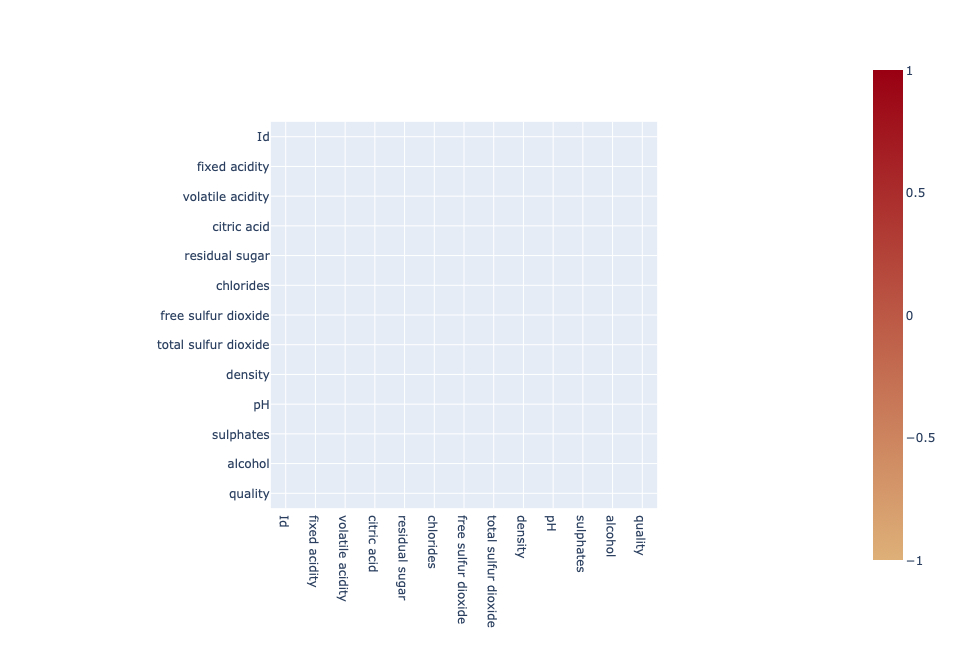

In [113]:
fig = px.imshow(df_combined.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

### <b><span style='color:#DEB078'>7.3 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Test Data</span></b>

In [114]:
temp_corr_test=df_test.corr(method='spearman')
temp_corr_test

Id  fixed acidity  volatile acidity  citric acid  \
Id                    1.000000       0.009468          0.057720    -0.018463   
fixed acidity         0.009468       1.000000         -0.353356     0.685326   
volatile acidity      0.057720      -0.353356          1.000000    -0.664649   
citric acid          -0.018463       0.685326         -0.664649     1.000000   
residual sugar        0.027515       0.283957         -0.080295     0.222845   
chlorides            -0.004714       0.299015          0.095923     0.169336   
free sulfur dioxide   0.015689      -0.207368          0.102654    -0.175723   
total sulfur dioxide -0.005145      -0.096792          0.133024    -0.098123   
density               0.000660       0.599579         -0.066539     0.381201   
pH                    0.036081      -0.683538          0.293638    -0.538632   
sulphates            -0.026089       0.170653         -0.411852     0.353438   
alcohol               0.011141      -0.046043         -0.267274     0.111261   

                      residual sugar  chlorides  free sulfur dioxide  \
Id                          0.027515  -0.004714             0.015689   
fixed acidity               0.283957   0.299015            -0.207368   
volatile acidity           -0.080295   0.095923             0.102654   
citric acid                 0.222845   0.169336            -0.175723   
residual sugar              1.000000   0.163097            -0.045145   
chlorides                   0.163097   1.000000             0.011114   
free sulfur dioxide        -0.045145   0.011114             1.000000   
total sulfur dioxide       -0.002931   0.107625             0.776877   
density                     0.294177   0.435664            -0.066889   
pH                         -0.142580  -0.185637             0.128401   
sulphates                   0.087611  -0.034247            -0.115620   
alcohol                     0.082319  -0.264538            -0.149486   

                      total sulfur dioxide   density        pH  sulphates  \
Id                               -0.005145  0.000660  0.036081  -0.026089   
fixed acidity                    -0.096792  0.599579 -0.683538   0.170653   
volatile acidity                  0.133024 -0.066539  0.293638  -0.411852   
citric acid                      -0.098123  0.381201 -0.538632   0.353438   
residual sugar                   -0.002931  0.294177 -0.142580   0.087611   
chlorides                         0.107625  0.435664 -0.185637  -0.034247   
free sulfur dioxide               0.776877 -0.066889  0.128401  -0.115620   
total sulfur dioxide              1.000000  0.122828 -0.003385  -0.193008   
density                           0.122828  1.000000 -0.380400  -0.020984   
pH                               -0.003385 -0.380400  1.000000  -0.065000   
sulphates                        -0.193008 -0.020984 -0.065000   1.000000   
alcohol                          -0.334946 -0.396960  0.099329   0.322419   

                       alcohol  
Id                    0.011141  
fixed acidity        -0.046043  
volatile acidity     -0.267274  
citric acid           0.111261  
residual sugar        0.082319  
chlorides            -0.264538  
free sulfur dioxide  -0.149486  
total sulfur dioxide -0.334946  
density              -0.396960  
pH                    0.099329  
sulphates             0.322419  
alcohol               1.000000

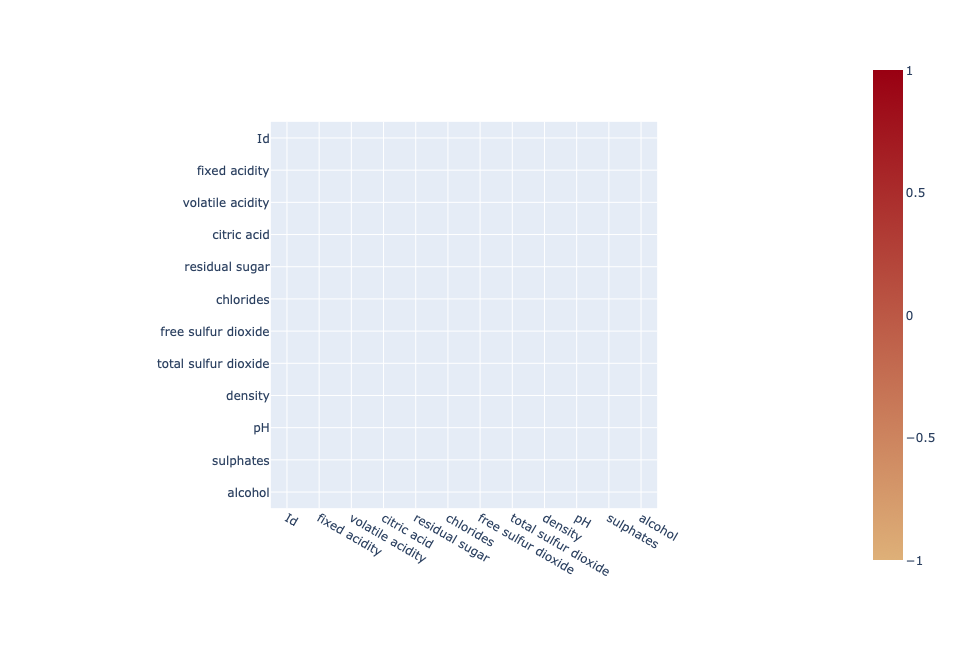

In [115]:
fig = px.imshow(df_test.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Leaving Quality Column , we can see approx same relation in Combined and Test Data</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>8 | Multivariate Analysis wrt Quality</div></b>

### <b><span style='color:#DEB078'>8.1 |</span><span style='color:#990012'> Relation with Quality in terms of corr coeficient (Combined Training and Org Data)</span></b>

In [116]:
# Used spearman since quality exhibits ordinal variable with categorical behaviours
temp_corr_score=df_combined.corr(method='spearman').loc[['quality']]
temp_corr_score

Id  fixed acidity  volatile acidity  citric acid  \
quality  0.048573       0.079905         -0.300967     0.179903   

         residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
quality        0.033722  -0.117695            -0.066055             -0.213565   

          density        pH  sulphates   alcohol  quality  
quality -0.173257  0.001892   0.433785  0.500502      1.0

In [117]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='quality',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [118]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  ['alcohol']

Weak ->  ['volatile acidity', 'sulphates']

No_relationship ->  ['Id', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> No strong relationship exist for quality , we can see 3 columns (volatile acidity, sulphates, alcohol) showing weak to moderate relationship with quality </div>

### <b><span style='color:#DEB078'>8.2 |</span><span style='color:#990012'> Relation with Quality using pairplot (Combined Training and Org Data)</span></b>

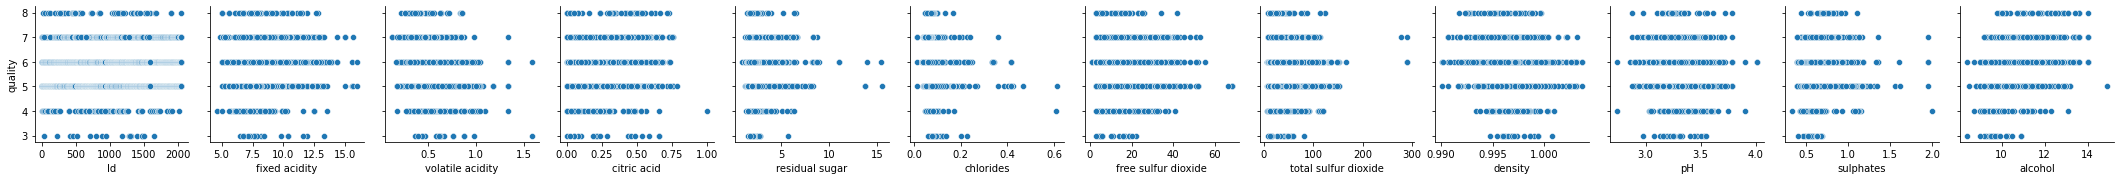

In [119]:
sns.pairplot(data=df_combined,
                  y_vars='quality',
                  x_vars=df_combined.drop(columns=['quality','src']).columns
            
)
                  
plt.show()


In [120]:
p=df_combined.drop(columns=['quality','src','Id']).columns

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  Looking at alcohol vs quality it seems drink with higher alcohol content tends to have high ratings<br>
 Looking at volatile acidity it seems drink with lower volatile acidity content tends to have higher ratings<br>
 Looking at sulphates vs quality it seems drink with higher alcohol content tends to have high ratings</div>

### <b><span style='color:#DEB078'>8.3 |</span><span style='color:#990012'> Relation with Quality using boxplot (Combined Training and Org Data)</span></b>

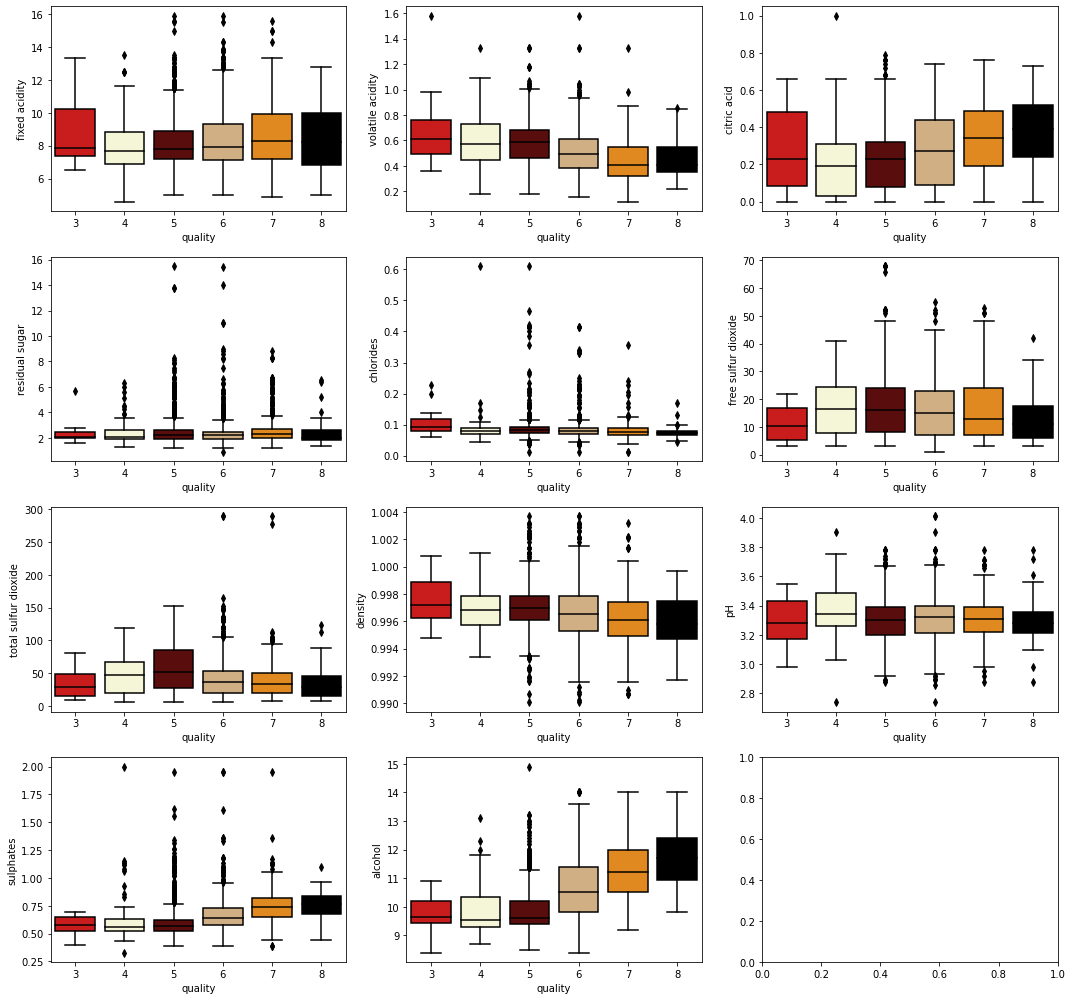

In [121]:
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

y=3
x=math.ceil(len(cont_features)/y)

plt.subplots(x,y,figsize=(15,14))

for i in range(1,len(cont_features)+1) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df_combined,y=cont_features[i-1],x='quality',palette=['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'])
plt.tight_layout()    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Median of high rating drinks is higher in sulphates, alcohol and citric acid<br>
* Median of high rating drinks is lower in chlorides, density and residual sugar 

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Multivariate Analysis leaving Quality</div></b>

### <b><span style='color:#DEB078'>9.1 |</span><span style='color:#990012'> Other Interesting Relationships For Training Data (Original & Training Data Combined)</span></b>

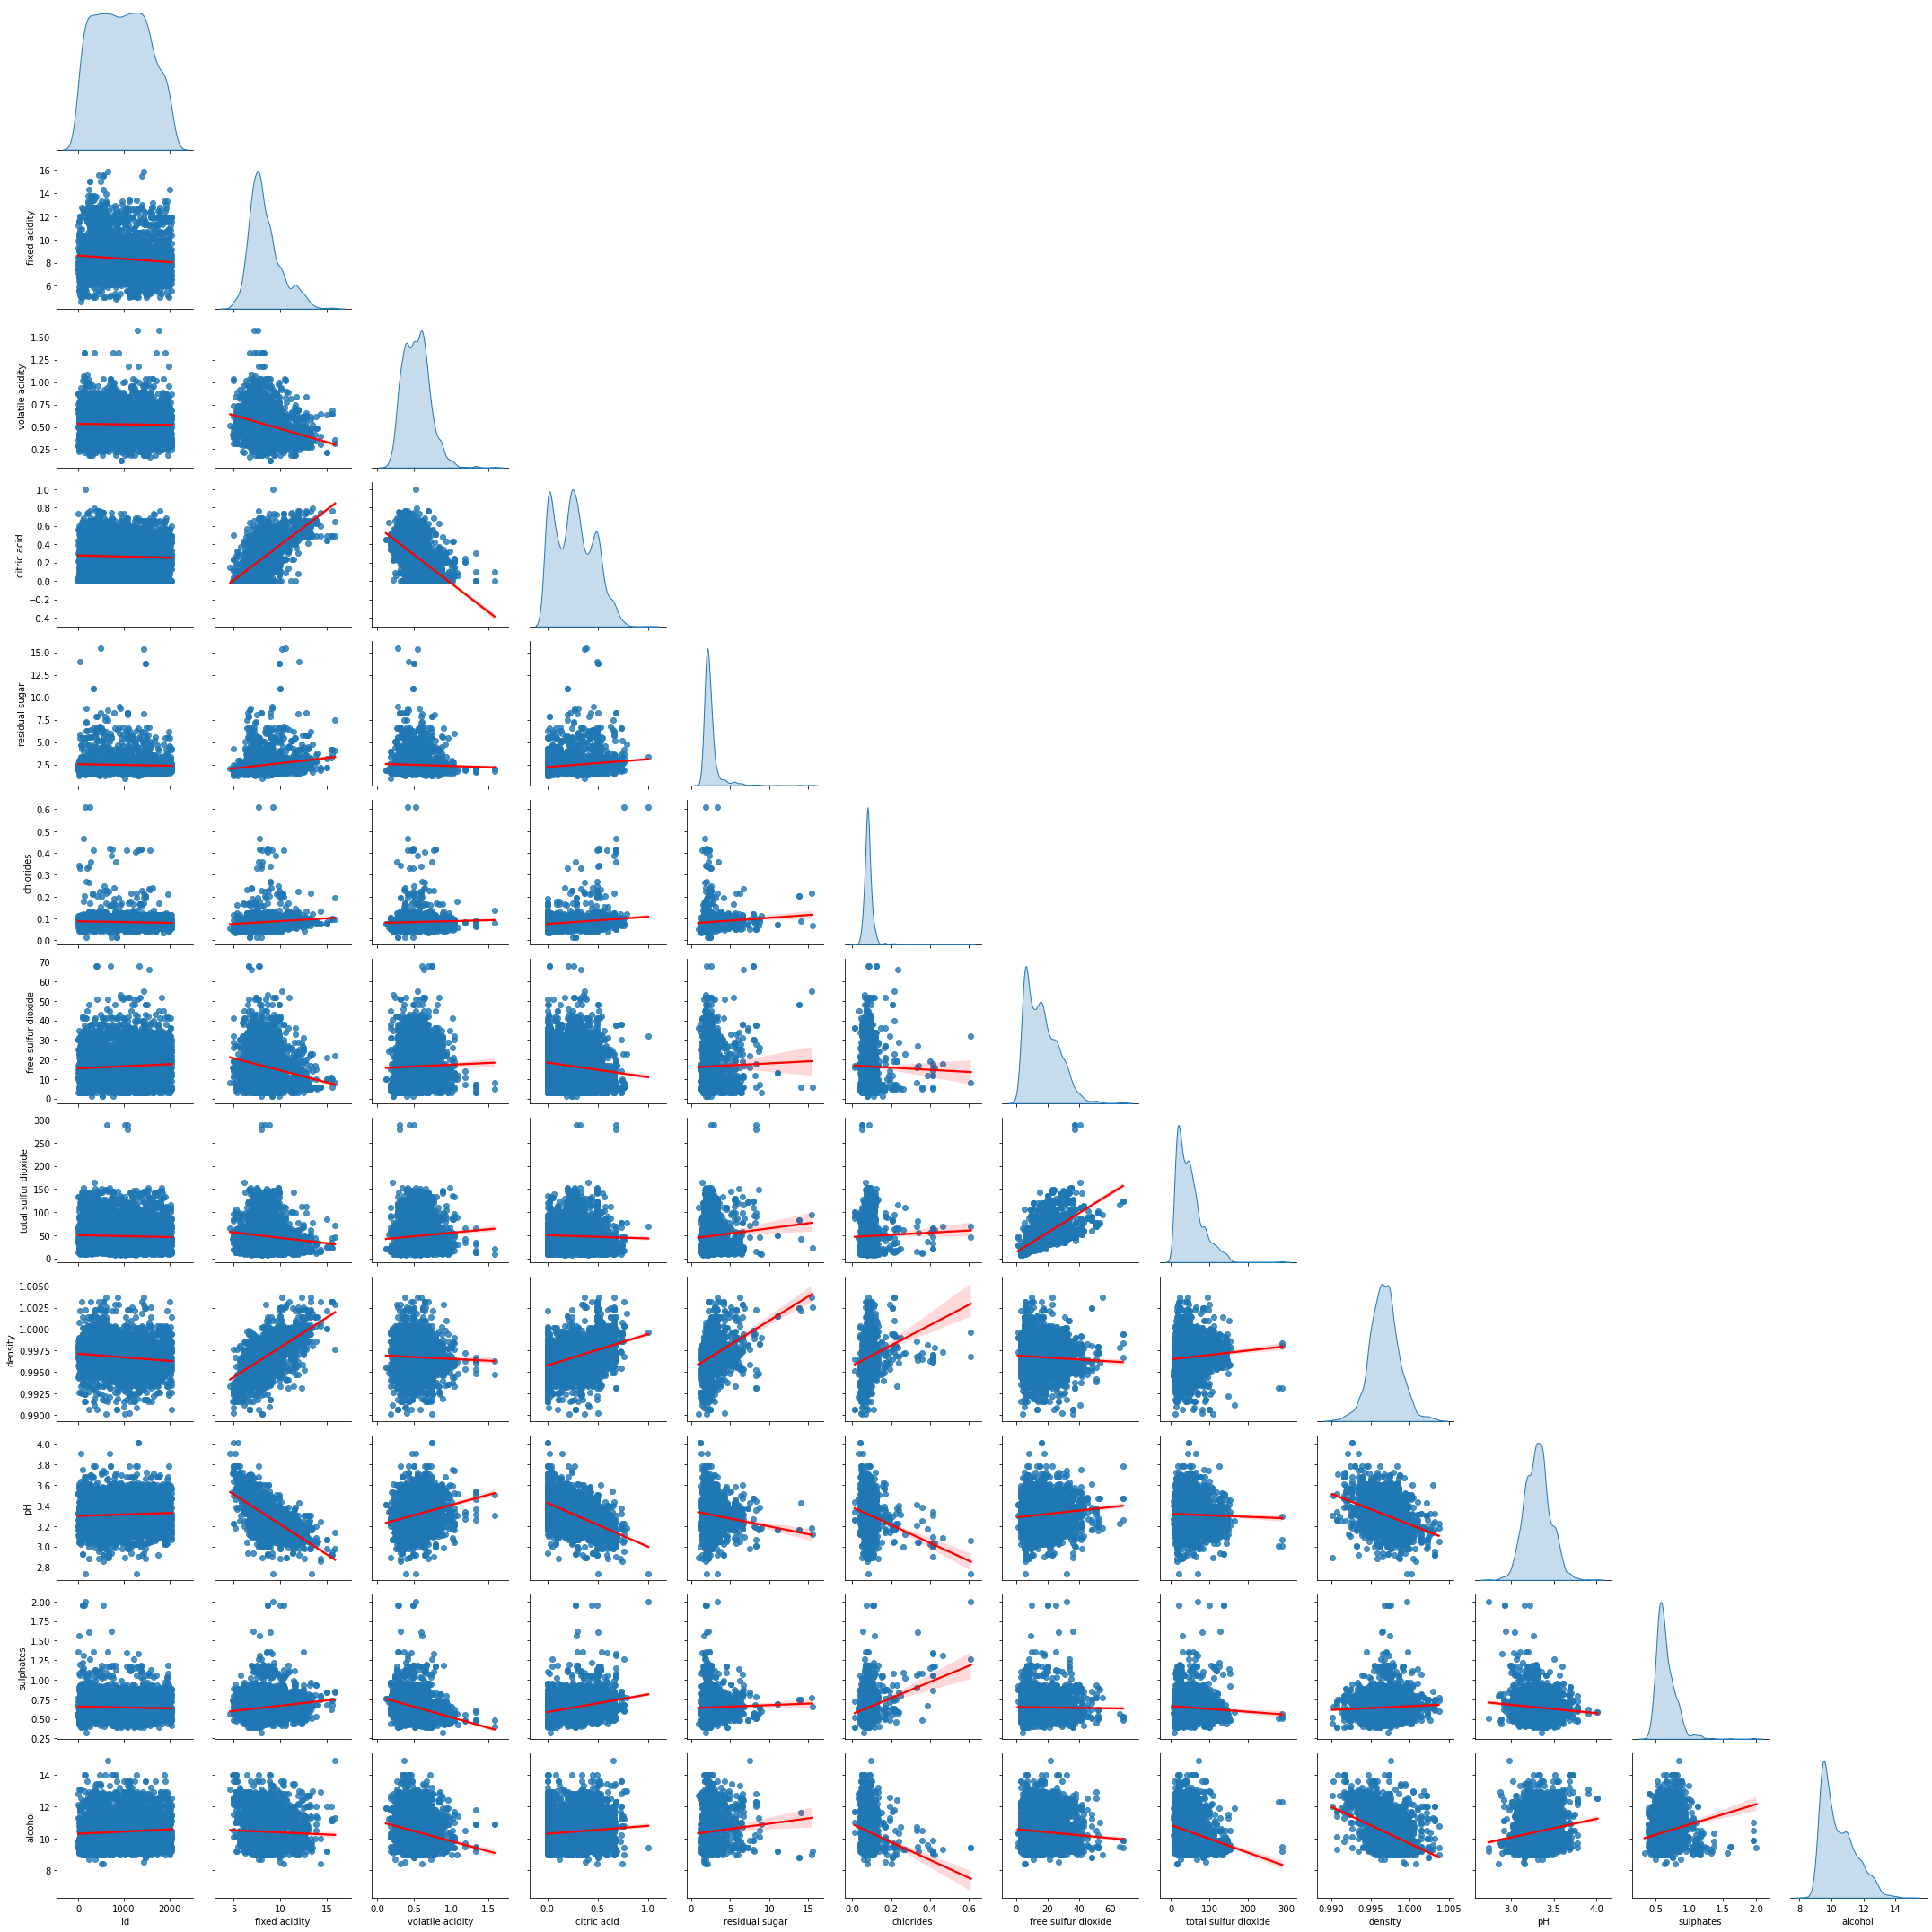

In [122]:
sns.pairplot(df_combined.drop(columns=['quality','src']),kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [123]:
temp_corr=df_combined.corr(method='spearman')
temp_corr.drop(columns=['quality'],index=['quality'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  [('free sulfur dioxide', 'total sulfur dioxide')]

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('residual sugar', 'density'), ('chlorides', 'density'), ('chlorides', 'alcohol'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol'), ('sulphates', 'alcohol')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has strong relationship with total sulfur dioxide .<br>

### <b><span style='color:#DEB078'>9.2 |</span><span style='color:#990012'> Other Interesting Relationships For Test Data</span></b>

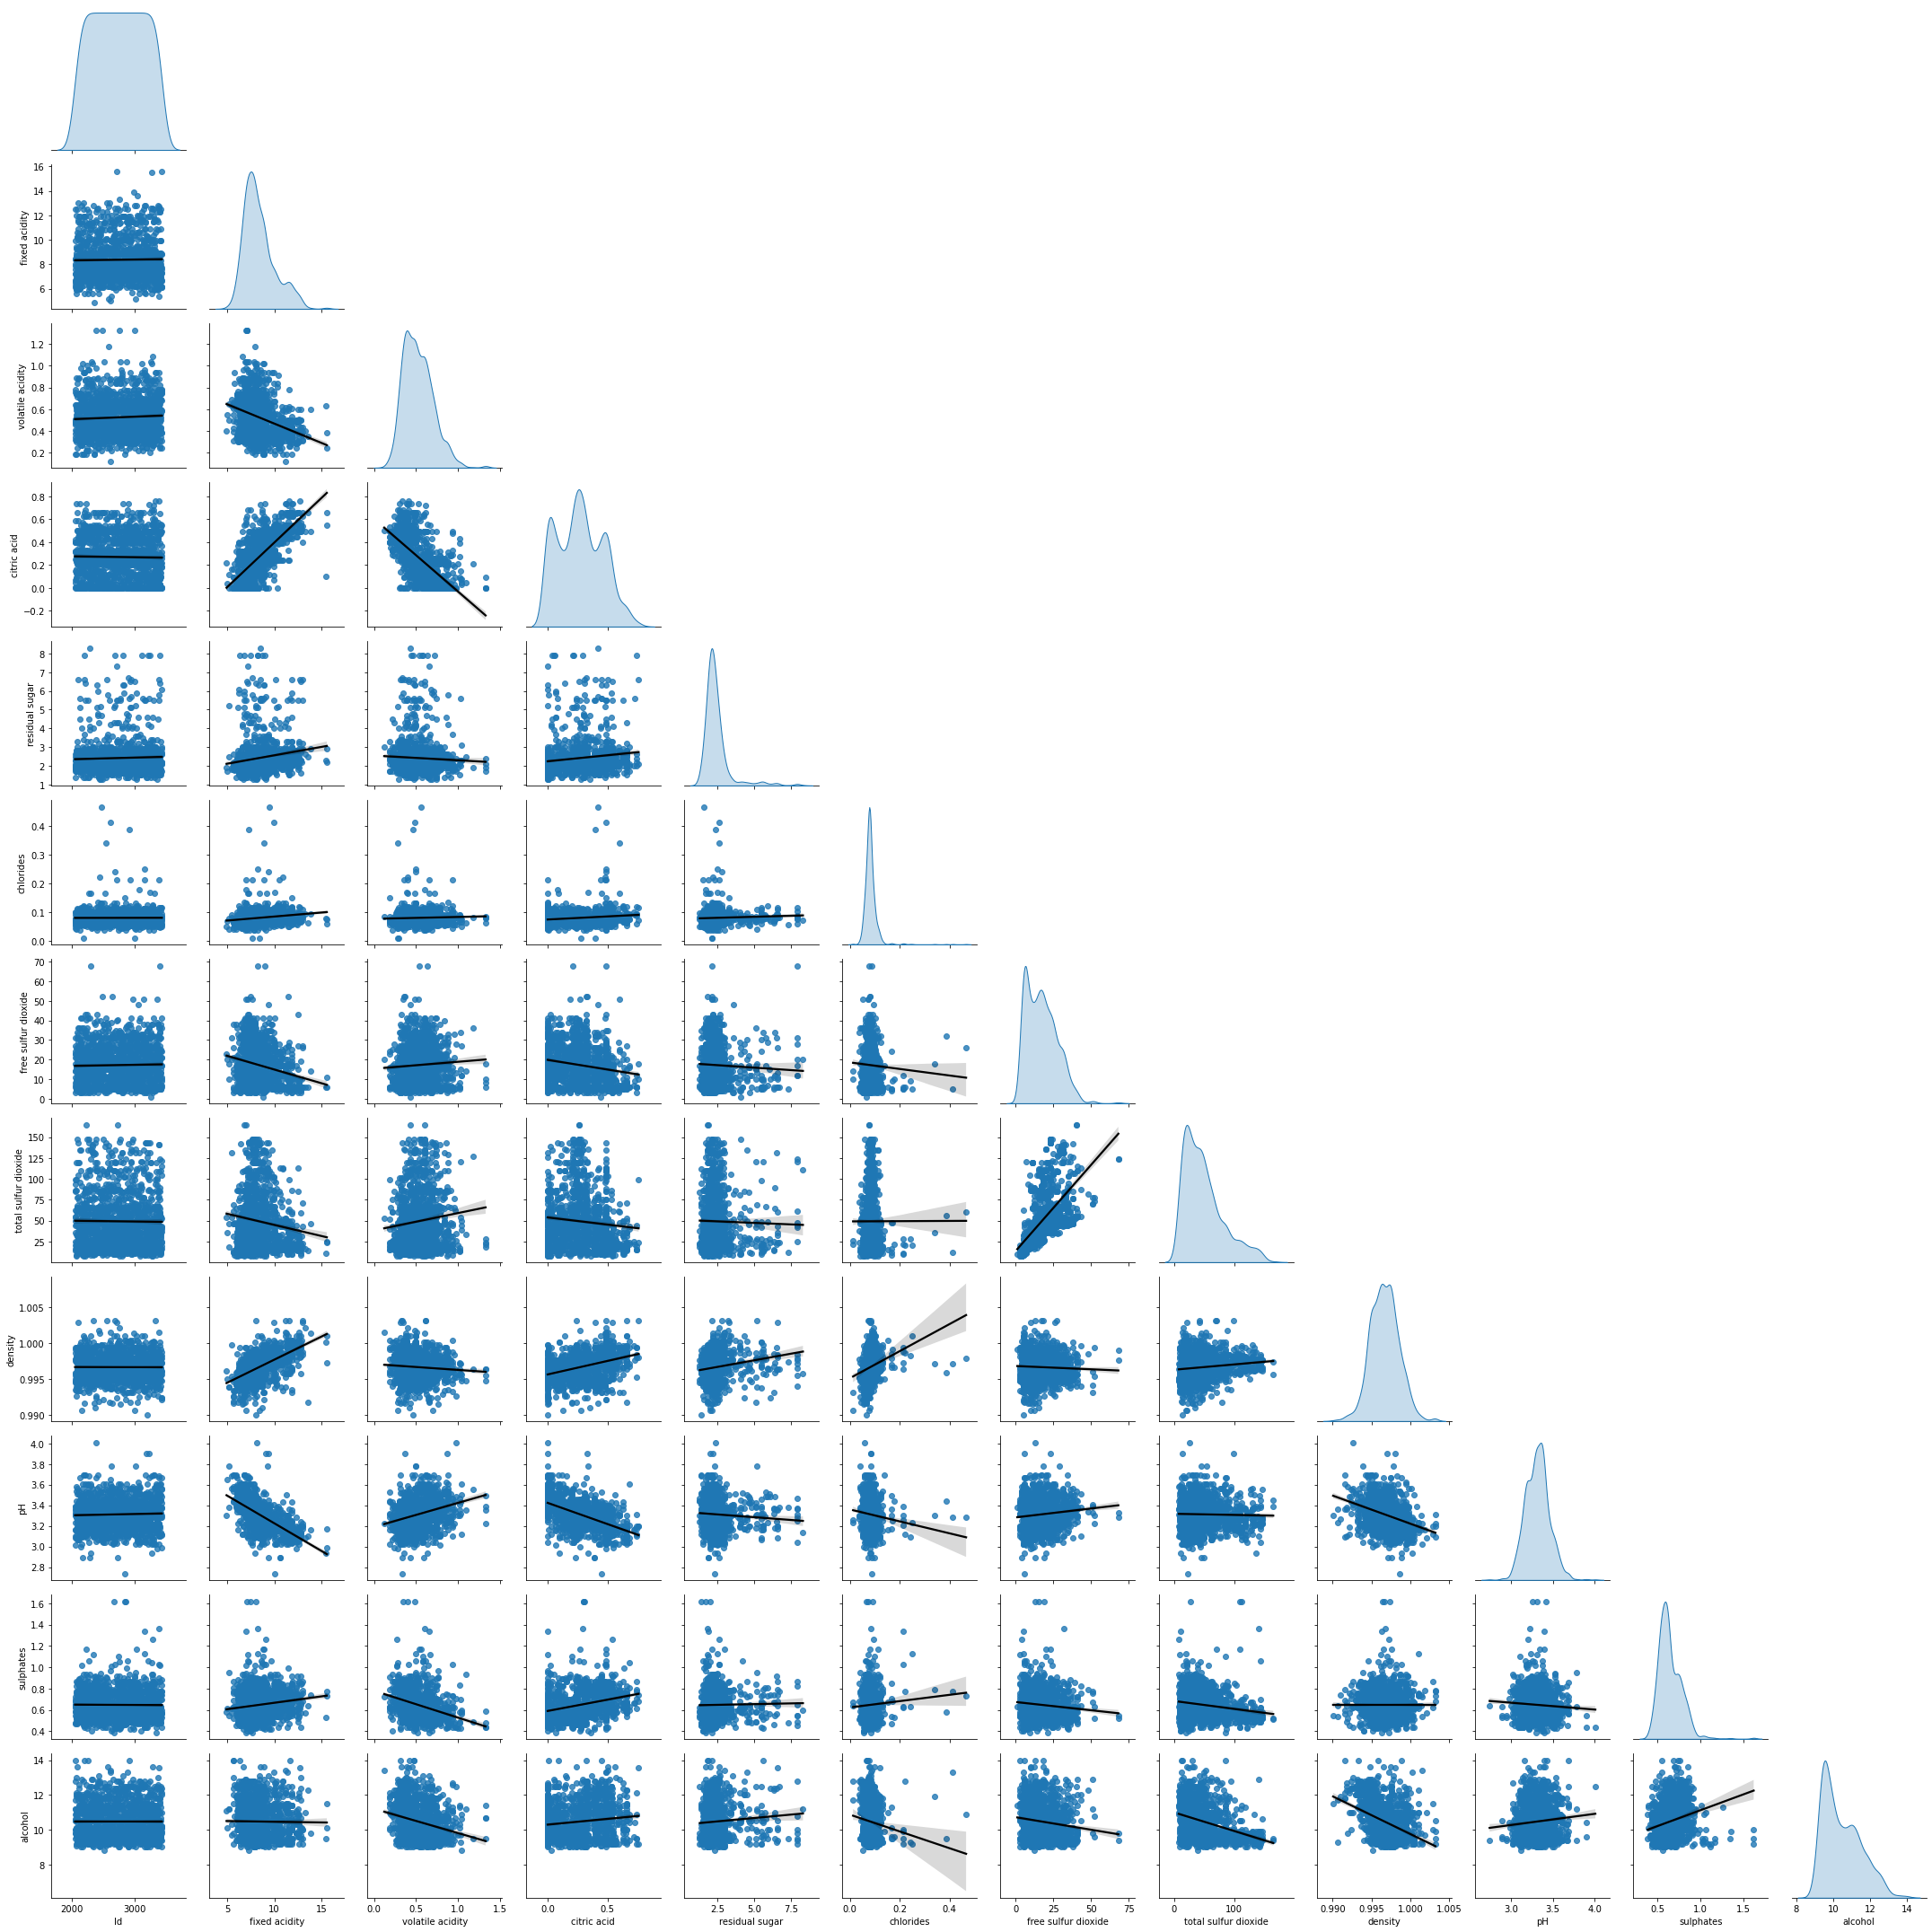

In [124]:

sns.pairplot(df_test,kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'black'}},corner=True)
plt.tight_layout()
plt.show()

In [125]:
temp_corr=df_test.corr(method='spearman')
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  [('free sulfur dioxide', 'total sulfur dioxide')]

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('volatile acidity', 'alcohol'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('residual sugar', 'density'), ('chlorides', 'density'), ('chlorides', 'alcohol'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol'), ('sulphates', 'alcohol')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has strong relationship with total sulfur dioxide .<br>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>10 | Analysis So Far</div></b>

* Distribution between training , test & Original data is approx same.
* Relationship between variables is similliar among test and combined data (training & Original data)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>11 | Data Preparation ( Normal and Smote ) </div></b>

### <b><span style='color:#DEB078'>11.1 |</span><span style='color:#990012'> Data and Random State Setup</span></b>

In [126]:
random_number=12

In [127]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]

In [128]:
Y=Y-3
Y=Y.astype(np.int16)

In [129]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X , Y, stratify=Y, random_state = random_number ,test_size =0.30)

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * We Scaled down the target variable classes to make it compatible to xgb classifier<br>
* Splitted data into training and validation set <br>
* We will be using smote in training set.<br>

### <b><span style='color:#DEB078'>11.2 |</span><span style='color:#990012'> Regular Training Data</span></b>

In [130]:
print('X_train.shape  -> ',X_train.shape,'  |  Y_train.shape  -> ',Y_train.shape)

X_train.shape  ->  (2239, 11)   |  Y_train.shape  ->  (2239, 1)


In [131]:
Y_train.value_counts()

quality
2          925
3          868
4          333
1           62
5           38
0           13
dtype: int64

### <b><span style='color:#DEB078'>11.3 |</span><span style='color:#990012'> Smote Training Data</span></b>

In [132]:
oversample = SMOTE(random_state=random_number)

X_train_Smot, Y_train_Smot = oversample.fit_resample(X_train, Y_train)

In [133]:
print('X_train.shape  -> ',X_train.shape,'  |  Y_train.shape  -> ',Y_train.shape)

X_train.shape  ->  (2239, 11)   |  Y_train.shape  ->  (2239, 1)


In [134]:
Y_train_Smot.value_counts()

quality
0          925
1          925
2          925
3          925
4          925
5          925
dtype: int64

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>12 | Classification Approach </div></b>

### <b><span style='color:#DEB078'>12.1 |</span><span style='color:#990012'> Metrics and Initial Setups</span></b>

In [135]:
All_Model_Predictions=pd.DataFrame()
All_Model_Stats=pd.DataFrame(columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED'])

All_Model_Predictions = pd.concat([All_Model_Predictions, Y_validation], axis=1).reset_index(drop=True)
All_Model_Predictions = All_Model_Predictions.rename(columns={'quality':'Target_Variable'})


kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=random_number)
scoring_method = 'kappa'

### <b><span style='color:#DEB078'>12.2 |</span><span style='color:#990012'> Model Algorithms Initialisation</span></b>

In [136]:
models = {
                "DTC" : DecisionTreeClassifier(random_state=random_number),
                "ETC" : ExtraTreeClassifier(random_state=random_number)    ,
                "RFC" : RandomForestClassifier(random_state=random_number),
                'KNN': KNeighborsClassifier(),
                "ABC" : AdaBoostClassifier(random_state=random_number)  ,
                "BC" : BaggingClassifier(random_state=random_number)  ,
                "GBC" : GradientBoostingClassifier(random_state=random_number),
                "XGB" : XGBClassifier(random_state=random_number),
                "LGBM" : LGBMClassifier( random_state=random_number)
                }

### <b><span style='color:#DEB078'>12.3 |</span><span style='color:#990012'> Model Fitting on Regular Data</span></b>

In [137]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)
models_predictions=pd.DataFrame()
model_stats=pd.DataFrame()
kappa_scorer = make_scorer(cohen_kappa_score,weights='quadratic')

print('*'*25)

for name, model in models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring=kappa_scorer,cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train,Y_train) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter','TRAIN_KAPPA':cv_score.mean(),
              'VALIDATION_KAPPA':metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base']=y_pred_model
    
    
    print('*'*25)
    
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

*************************
DTC: Train Score -> 0.359176 (SD 0.051596)
Validation Score ->  0.42804073730107506
*************************
ETC: Train Score -> 0.318915 (SD 0.054036)
Validation Score ->  0.268034753441569
*************************
RFC: Train Score -> 0.497445 (SD 0.057596)
Validation Score ->  0.5475446232946743
*************************
KNN: Train Score -> 0.227580 (SD 0.068118)
Validation Score ->  0.26590324753564876
*************************
ABC: Train Score -> 0.423920 (SD 0.079081)
Validation Score ->  0.47972228016329455
*************************
BC: Train Score -> 0.460553 (SD 0.071135)
Validation Score ->  0.48434006345382863
*************************
GBC: Train Score -> 0.506222 (SD 0.055460)
Validation Score ->  0.5212786212824293
*************************
XGB: Train Score -> 0.479456 (SD 0.066341)
Validation Score ->  0.4955841450306395
*************************
LGBM: Train Score -> 0.503940 (SD 0.055268)
Validation Score ->  0.521457946219819
*****************

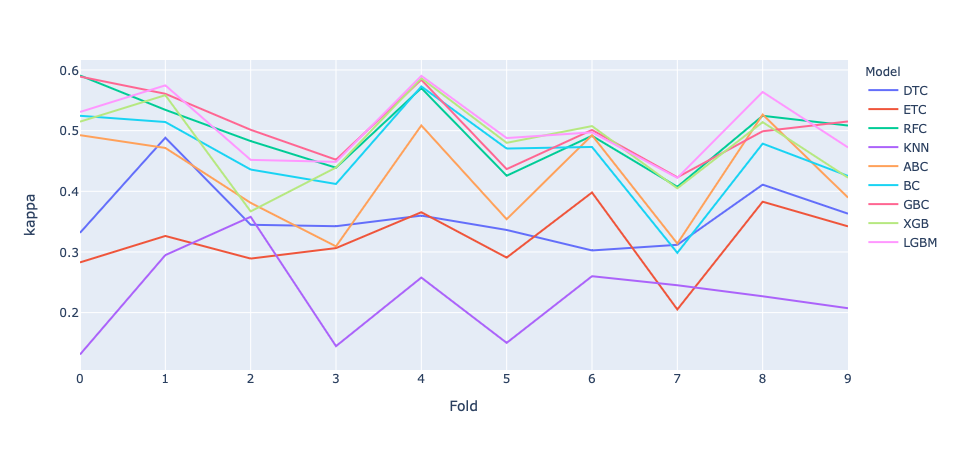

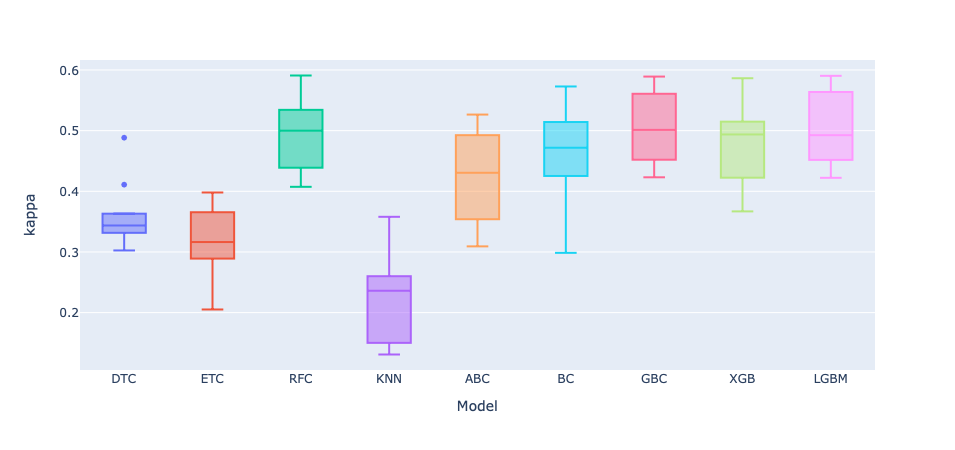

In [138]:
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * During Training using base models on regular training data , RFC performs better compared to other<br>

### <b><span style='color:#DEB078'>12.4 |</span><span style='color:#990012'> Model Fitting on Smote Data</span></b>

In [139]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)
models_predictions=pd.DataFrame()
model_stats=pd.DataFrame()
kappa_scorer = make_scorer(cohen_kappa_score,weights='quadratic')

print('*'*25)

for name, model in models.items():
    
    cv_score=cross_val_score(model,X_train_Smot,Y_train_Smot,scoring=kappa_scorer,cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train_Smot,Y_train_Smot) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter_With_Smote','TRAIN_KAPPA':cv_score.mean(),
              'VALIDATION_KAPPA':metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base_With_Smote'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base_With_Smote']=y_pred_model
    
    
    print('*'*25)  
    
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

*************************
DTC: Train Score -> 0.883533 (SD 0.014407)
Validation Score ->  0.3778729268766571
*************************
ETC: Train Score -> 0.867344 (SD 0.014813)
Validation Score ->  0.3350986184636302
*************************
RFC: Train Score -> 0.950319 (SD 0.004764)
Validation Score ->  0.5199596547288163
*************************
KNN: Train Score -> 0.834979 (SD 0.017261)
Validation Score ->  0.1961879942589494
*************************
ABC: Train Score -> 0.681039 (SD 0.035145)
Validation Score ->  0.36216834381638874
*************************
BC: Train Score -> 0.930128 (SD 0.006161)
Validation Score ->  0.4101267696579747
*************************
GBC: Train Score -> 0.911838 (SD 0.009929)
Validation Score ->  0.4643761531489572
*************************
XGB: Train Score -> 0.950961 (SD 0.008164)
Validation Score ->  0.49362809313669265
*************************
LGBM: Train Score -> 0.950538 (SD 0.007079)
Validation Score ->  0.5174674581121856
*****************

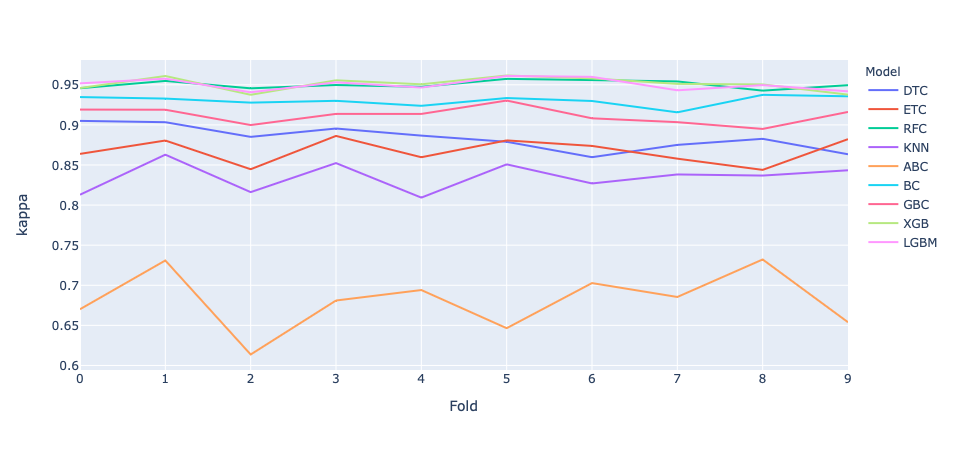

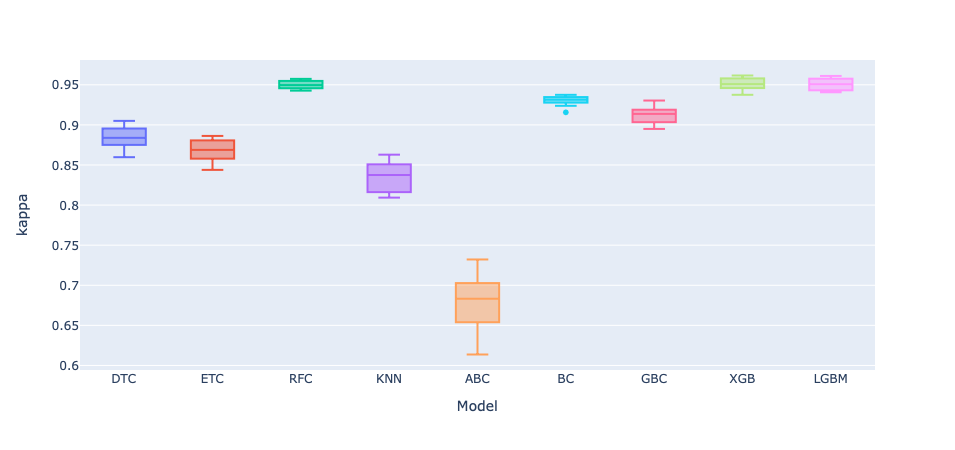

In [140]:
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()  

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * During Training using base models on Smote training data , RFC and XGB performs better compared to other<br>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>13 | Overall Performance </div></b>

### <b><span style='color:#DEB078'>13.1 |</span><span style='color:#990012'> Analyzing Model Performances</span></b>

In [141]:
All_Model_Stats.sort_values(['VALIDATION_KAPPA'],ascending=False)

MODEL_NAME               MODEL_CONDITION  TRAIN_KAPPA  VALIDATION_KAPPA  \
2         RFC             Default_Parameter     0.497445          0.547545   
8        LGBM             Default_Parameter     0.503940          0.521458   
6         GBC             Default_Parameter     0.506222          0.521279   
11        RFC  Default_Parameter_With_Smote     0.950319          0.519960   
17       LGBM  Default_Parameter_With_Smote     0.950538          0.517467   
7         XGB             Default_Parameter     0.479456          0.495584   
16        XGB  Default_Parameter_With_Smote     0.950961          0.493628   
5          BC             Default_Parameter     0.460553          0.484340   
4         ABC             Default_Parameter     0.423920          0.479722   
15        GBC  Default_Parameter_With_Smote     0.911838          0.464376   
0         DTC             Default_Parameter     0.359176          0.428041   
14         BC  Default_Parameter_With_Smote     0.930128          0.410127   
9         DTC  Default_Parameter_With_Smote     0.883533          0.377873   
13        ABC  Default_Parameter_With_Smote     0.681039          0.362168   
10        ETC  Default_Parameter_With_Smote     0.867344          0.335099   
1         ETC             Default_Parameter     0.318915          0.268035   
3         KNN             Default_Parameter     0.227580          0.265903   
12        KNN  Default_Parameter_With_Smote     0.834979          0.196188   

                                  MODEL_INSTANCE_USED            IDENTIFIER  
2   (DecisionTreeClassifier(max_features='auto', r...              RFC_Base  
8                     LGBMClassifier(random_state=12)             LGBM_Base  
6   ([DecisionTreeRegressor(criterion='friedman_ms...              GBC_Base  
11  (DecisionTreeClassifier(max_features='auto', r...   RFC_Base_With_Smote  
17                    LGBMClassifier(random_state=12)  LGBM_Base_With_Smote  
7   XGBClassifier(base_score=0.5, booster='gbtree'...              XGB_Base  
16  XGBClassifier(base_score=0.5, booster='gbtree'...   XGB_Base_With_Smote  
5   (DecisionTreeClassifier(random_state=191961371...               BC_Base  
4   (DecisionTreeClassifier(max_depth=1, random_st...              ABC_Base  
15  ([DecisionTreeRegressor(criterion='friedman_ms...   GBC_Base_With_Smote  
0             DecisionTreeClassifier(random_state=12)              DTC_Base  
14  (DecisionTreeClassifier(random_state=191961371...    BC_Base_With_Smote  
9             DecisionTreeClassifier(random_state=12)   DTC_Base_With_Smote  
13  (DecisionTreeClassifier(max_depth=1, random_st...   ABC_Base_With_Smote  
10               ExtraTreeClassifier(random_state=12)   ETC_Base_With_Smote  
1                ExtraTreeClassifier(random_state=12)              ETC_Base  
3                              KNeighborsClassifier()              KNN_Base  
12                             KNeighborsClassifier()   KNN_Base_With_Smote

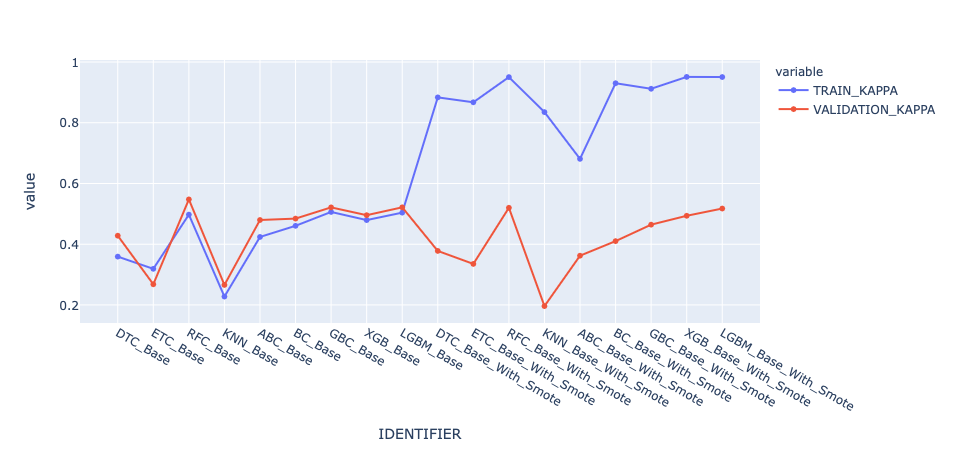

In [142]:
line = px.line(data_frame= All_Model_Stats ,x='IDENTIFIER',y =['TRAIN_KAPPA','VALIDATION_KAPPA'] , markers = True)
line.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Performance on validation set seems to remain approx similliar using models trained with both type of data<br>
* Performance on training set increased with Smote training data<br>

### <b><span style='color:#DEB078'>13.2 |</span><span style='color:#990012'> Analyzing Predictions Made wrt Target Prediction </span></b>

In [143]:
All_Model_Predictions+3

Target_Variable  DTC_Base  ETC_Base  RFC_Base  KNN_Base  ABC_Base  \
0                  5         5         5         5         6         5   
1                  5         5         4         5         5         5   
2                  5         5         5         5         5         5   
3                  5         5         5         5         5         5   
4                  5         7         6         6         6         6   
..               ...       ...       ...       ...       ...       ...   
955                7         7         6         7         5         8   
956                5         5         5         5         5         6   
957                6         5         5         5         6         5   
958                5         5         4         6         5         5   
959                3         6         6         6         6         5   

     BC_Base  GBC_Base  XGB_Base  LGBM_Base  DTC_Base_With_Smote  \
0          5         5         5          5                    4   
1          5         5         5          5                    6   
2          5         5         5          5                    5   
3          6         5         5          5                    5   
4          6         6         6          6                    6   
..       ...       ...       ...        ...                  ...   
955        7         7         7          7                    6   
956        6         5         5          5                    5   
957        5         6         6          6                    5   
958        6         5         6          6                    5   
959        6         6         6          5                    6   

     ETC_Base_With_Smote  RFC_Base_With_Smote  KNN_Base_With_Smote  \
0                      5                    5                    7   
1                      4                    4                    4   
2                      5                    5                    5   
3                      6                    5                    3   
4                      7                    6                    7   
..                   ...                  ...                  ...   
955                    7                    7                    5   
956                    6                    5                    5   
957                    6                    6                    4   
958                    6                    5                    5   
959                    7                    6                    6   

     ABC_Base_With_Smote  BC_Base_With_Smote  GBC_Base_With_Smote  \
0                      4                   5                    5   
1                      3                   5                    5   
2                      3                   5                    5   
3                      5                   5                    5   
4                      6                   6                    6   
..                   ...                 ...                  ...   
955                    8                   6                    7   
956                    4                   5                    5   
957                    3                   4                    4   
958                    4                   5                    5   
959                    6                   5                    6   

     XGB_Base_With_Smote  LGBM_Base_With_Smote  
0                      5                     5  
1                      5                     5  
2                      5                     5  
3                      5                     5  
4                      6                     6  
..                   ...                   ...  
955                    7                     7  
956                    5                     5  
957                    6                     6  
958                    5                     6  
959                    5                     6  

[960 rows x 19 columns]

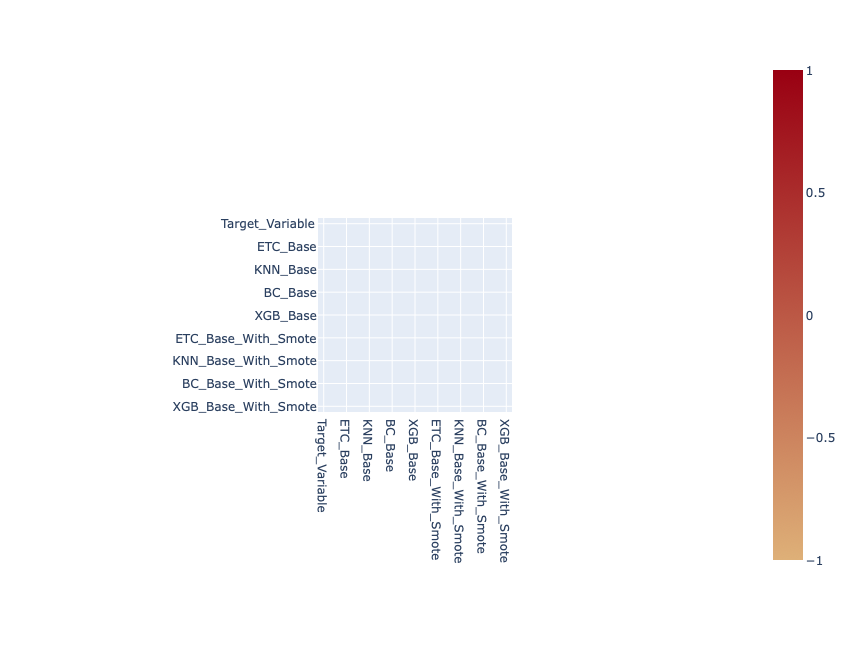

In [56]:
fig = px.imshow(All_Model_Predictions.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,height=650,color_continuous_scale=['#DEB078','#990012'])
fig.show()

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>14 | Regression Approach </div></b>

In [144]:
# In progress
random_number=12
kappa_scorer = make_scorer(cohen_kappa_score,weights='quadratic')

In [145]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]

In [146]:
Y=Y-3
Y=Y.astype(np.int16)

In [147]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X , Y, stratify=Y, random_state = random_number ,test_size =0.30)

In [148]:
selected_column=[]
current_mean=0
column_iteration =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [149]:
XGB =RandomForestClassifier(random_state=random_number)

kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=random_number)

In [150]:
j=1
while (len(column_iteration)!=0):
    print('*'*25,'no_of_columns ',j,'*'*25)
    col_comb={}
    mean_comb={}
    k=0
    for col in column_iteration:
        
        temp_combination=selected_column.copy()
        temp_combination.append(col)
        #print(temp_combination)
        cv_score=cross_val_score(XGB,X_train.loc[:,temp_combination],Y_train,scoring=kappa_scorer,cv=kf) 
        #print(cv_score.mean())
        col_comb[k]=temp_combination
        mean_comb[k]=cv_score.mean()
        
        k=k+1
    
    #print (col_comb)
    #print(mean_comb)
    Keymax = max(mean_comb, key= lambda x: mean_comb[x])
    if mean_comb[Keymax] < current_mean :
        print("No Improvement In This Loop")
        break;
    
    current_mean=mean_comb[Keymax]
    
    selected_column.append(col_comb[Keymax][-1])
    column_iteration.remove(col_comb[Keymax][-1])  
    print('Column Selected In this iteration -> ', col_comb[Keymax][-1])
    print('All selected Columns till now -> ',selected_column)
    print('Current Mean -> ',current_mean)

    
    j=j+1

************************* no_of_columns  1 *************************
Column Selected In this iteration ->  alcohol
All selected Columns till now ->  ['alcohol']
Current Mean ->  0.39488786456211394
************************* no_of_columns  2 *************************
Column Selected In this iteration ->  sulphates
All selected Columns till now ->  ['alcohol', 'sulphates']
Current Mean ->  0.4116851814187357
************************* no_of_columns  3 *************************
Column Selected In this iteration ->  citric acid
All selected Columns till now ->  ['alcohol', 'sulphates', 'citric acid']
Current Mean ->  0.4669963545178824
************************* no_of_columns  4 *************************
Column Selected In this iteration ->  fixed acidity
All selected Columns till now ->  ['alcohol', 'sulphates', 'citric acid', 'fixed acidity']
Current Mean ->  0.48833555043024496
************************* no_of_columns  5 *************************
Column Selected In this iteration ->  free 

In [151]:
selected_column=[]
current_mean=0
column_iteration =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [152]:
j=1
while (len(column_iteration)!=0):
    print('*'*25,'no_of_columns ',j,'*'*25)
    col_comb={}
    mean_comb={}
    k=0
    for col in column_iteration:
        
        temp_combination=selected_column.copy()
        temp_combination.append(col)
        #print(temp_combination)
        #cv_score=cross_val_score(XGB,X_train.loc[:,temp_combination],Y_train,scoring=kappa_scorer,cv=kf) 
        #print(cv_score.mean())
        XGB.fit(X_train.loc[:,temp_combination],Y_train)        
        y_pred_model = XGB.predict(X_validation.loc[:,temp_combination])
        col_comb[k]=temp_combination
        mean_comb[k]=metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic')
        
        k=k+1
    
    #print (col_comb)
    #print(mean_comb)
    Keymax = max(mean_comb, key= lambda x: mean_comb[x])
    if mean_comb[Keymax] < current_mean :
        print("No Improvement In This Loop")
        break;
    
    current_mean=mean_comb[Keymax]
    
    selected_column.append(col_comb[Keymax][-1])
    column_iteration.remove(col_comb[Keymax][-1])  
    print('Column Selected In this iteration -> ', col_comb[Keymax][-1])
    print('All selected Columns till now -> ',selected_column)
    print('Current Mean -> ',current_mean)

    
    j=j+1

************************* no_of_columns  1 *************************
Column Selected In this iteration ->  alcohol
All selected Columns till now ->  ['alcohol']
Current Mean ->  0.39783957710871065
************************* no_of_columns  2 *************************
Column Selected In this iteration ->  sulphates
All selected Columns till now ->  ['alcohol', 'sulphates']
Current Mean ->  0.4364064857663368
************************* no_of_columns  3 *************************
Column Selected In this iteration ->  chlorides
All selected Columns till now ->  ['alcohol', 'sulphates', 'chlorides']
Current Mean ->  0.4989995132767292
************************* no_of_columns  4 *************************
Column Selected In this iteration ->  citric acid
All selected Columns till now ->  ['alcohol', 'sulphates', 'chlorides', 'citric acid']
Current Mean ->  0.5105892035684365
************************* no_of_columns  5 *************************
Column Selected In this iteration ->  pH
All selected 

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>15 | Other Notebooks </div></b>

* https://www.kaggle.com/abhi011097/code

In [57]:
XGB.fit(X_train,Y_train)        
y_pred_model = XGB.predict(X_validation)
print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation))

Validation Score ->  0.3604384935048838


In [ ]:
    model.fit(X_train,Y_train) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation))